<a href="https://colab.research.google.com/github/hasib6750/sentiment-Analysis-on-IMDB-movie-site-comment/blob/main/sentiment_Analysis_on_IMDB_movie_site_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report , accuracy_score
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

print(data.shape)
data.head(20)

Mounted at /content/drive
(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data['review'].isnull().sum()
data.duplicated().sum()

418

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [ ]:
# Check for missing values in rows
missing_rows = data[data.isna().any(axis=1)]

# Display rows with missing values
print("Rows with missing values:")
print(missing_rows)
#check data types
print("Data types of columns:")
print(data.dtypes)


Rows with missing values:
Empty DataFrame
Columns: [review, sentiment]
Index: []
Data types of columns:
review       object
sentiment    object
dtype: object


In [ ]:
data['sentiment']=data['sentiment'].replace({'positive': 1, 'negative': 0})
#changing data type to numeric
data['sentiment'] = pd.to_numeric(data['sentiment'], errors='coerce')
data.dtypes

review       object
sentiment     int64
dtype: object

In [ ]:
data['sentiment'].value_counts()
print(len(data))

49582


<function matplotlib.pyplot.show(close=None, block=None)>

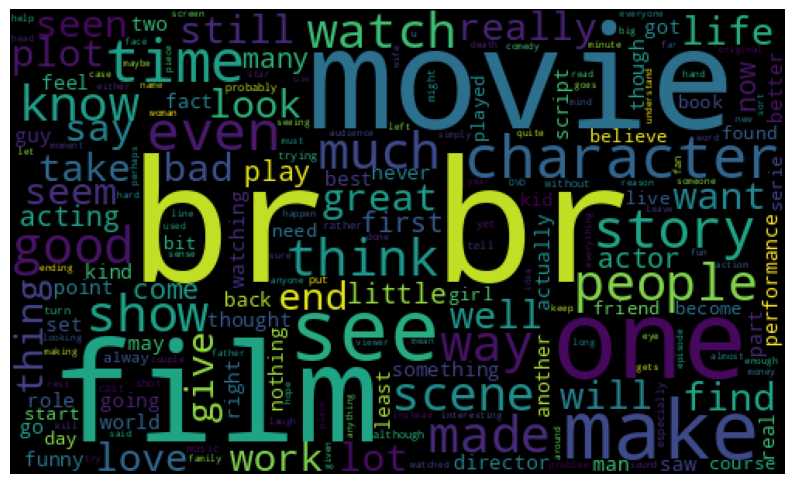

In [ ]:
allwords=' '.join(rvw for rvw in data['review'] )
wordCloud=WordCloud(width=500,height=300, max_font_size=110).generate(allwords)
plt.figure(figsize=(10, 8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show

In [ ]:
def word(sentiment):
  allwords=' '.join(rvw for rvw in data[data['sentiment']==sentiment]['review'])
  wordCloud=WordCloud(width=500,height=300, max_font_size=110).generate(allwords)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordCloud)
  plt.axis('off')
  plt.show


In [ ]:
word("negative")

ValueError: We need at least 1 word to plot a word cloud, got 0.

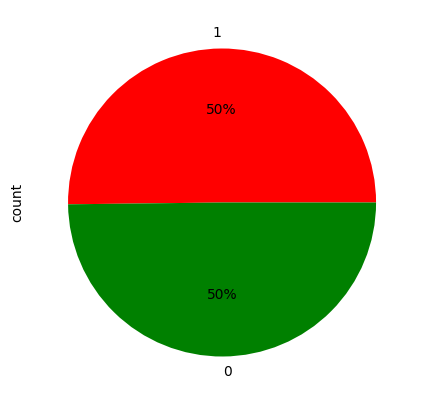

In [ ]:
data.sentiment.value_counts().plot(kind='pie' , autopct='%1.0f%%' , figsize=(5,5) , colors=["red" , "green"])
plt.show()

In [ ]:
lbl = preprocessing.LabelEncoder()
data['sentiment']=lbl.fit_transform(data['sentiment'])
data.sentiment.value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

In [ ]:
Rvw=data['review'].copy()
Snt=data['sentiment'].copy()

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop=stopwords.words('english')
stemmer=SnowballStemmer("english")

In [ ]:
def cleaner(review):
  review=review.lower()
  review=re.sub(r'<.*?/>' , ' ' , review)
  review=re.sub(r'#\w+' , ' ' , review)
  review=re.sub(r'<\d+' , ' ' , review)
  review=re.sub(r'@/^\w\s' , ' ' , review)
  review=re.sub(r'http//\s+' , ' ' , review)
  review=re.sub(r'^A-Za-z0-9' , ' ' , review)
  review=' '.join([word for word in review.split() if not word in stop])
  review=' '.join(stemmer.stem(word) for word in review.split())
  review=review.strip()
  return review

In [ ]:
Rvw

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49582, dtype: object

In [ ]:
Rvw_clean=Rvw.apply(cleaner)
Rvw_clean

0        one review mention watch 1 oz episod hooked. r...
1        wonder littl production. film techniqu unassum...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy (jake) think ther...
4        petter mattei "love time money" visual stun fi...
                               ...                        
49995    thought movi right good job. creativ origin fi...
49996    bad plot, bad dialogue, bad acting, idiot dire...
49997    cathol taught parochi elementari school nuns, ...
49998    i'm go disagre previous comment side maltin on...
49999    one expect star trek movi high art, fan expect...
Name: review, Length: 49582, dtype: object

In [ ]:
tfidfv=TfidfVectorizer()
tfidfv.fit(Rvw_clean)
Rvw=tfidfv.transform(Rvw_clean)

In [ ]:
Rvw_train, Rvw_test , Snt_train , Snt_test= train_test_split(Rvw , Snt , train_size=0.7)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      7400
           1       0.85      0.87      0.86      7475

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



<BarContainer object of 1 artists>

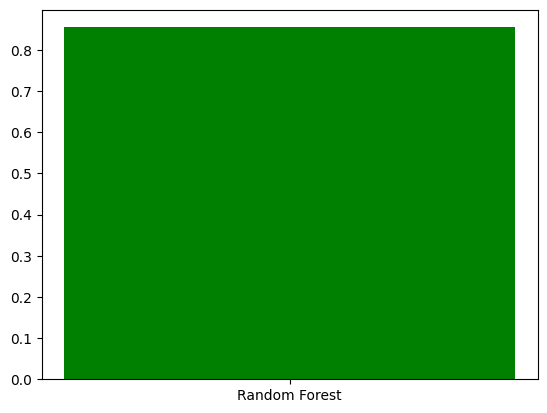

In [ ]:
#Random forest
Rf_class = RandomForestClassifier(n_estimators=500, random_state=0)
Rf_class.fit(Rvw_train, Snt_train)
Snt_pr_rf= Rf_class.predict(Rvw_test)
print(classification_report(Snt_test , Snt_pr_rf))
rf_acc=accuracy_score(Snt_test , Snt_pr_rf)
plt.bar(['Random Forest'], [rf_acc], color='green')

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7400
           1       0.83      0.88      0.86      7475

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



<BarContainer object of 1 artists>

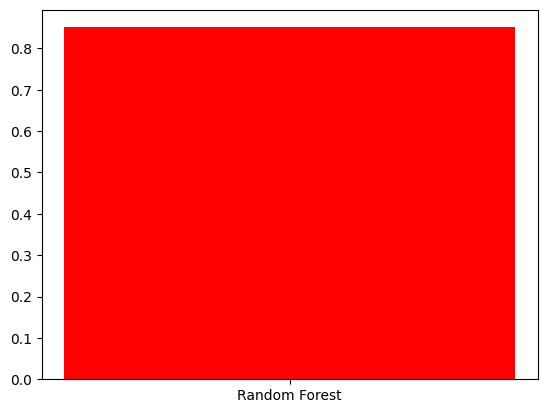

In [ ]:
#Gradiant boosting
gb_class = GradientBoostingClassifier(n_estimators=500, random_state=0)
gb_class.fit(Rvw_train, Snt_train)
Snt_pr_gb = gb_class.predict(Rvw_test)
print(classification_report(Snt_test, Snt_pr_gb))
gb_acc=accuracy_score(Snt_test , Snt_pr_gb)
plt.bar(['Random Forest'], [gb_acc], color='red')

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7400
           1       0.87      0.91      0.89      7475

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



<BarContainer object of 1 artists>

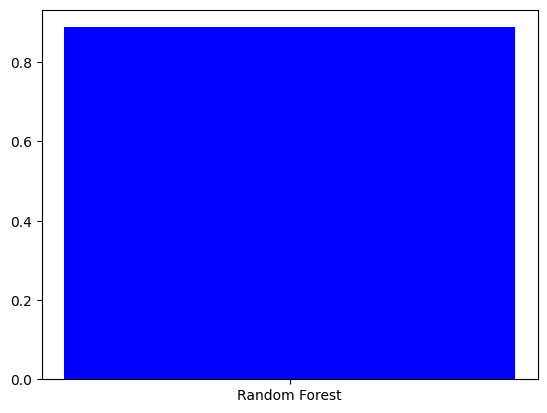

In [ ]:
#Logistic reggression
log_class=LogisticRegression(random_state=0)
log_class.fit(Rvw_train, Snt_train)
Snt_pr_log=log_class.predict(Rvw_test)
print(classification_report(Snt_test , Snt_pr_log))
log_acc=accuracy_score(Snt_test , Snt_pr_log)
plt.bar(['Random Forest'], [log_acc], color='blue')

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7385
           1       0.89      0.90      0.90      7490

    accuracy                           0.89     14875
   macro avg       0.90      0.89      0.89     14875
weighted avg       0.90      0.89      0.89     14875



<BarContainer object of 1 artists>

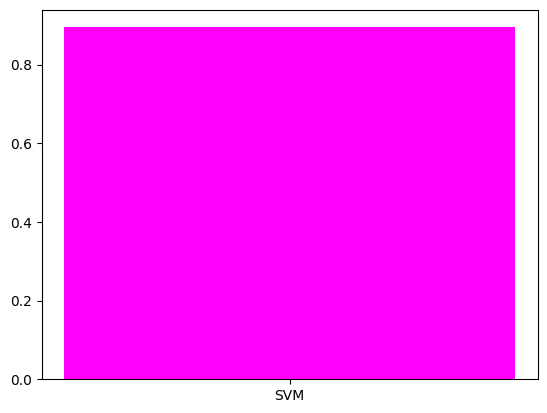

In [ ]:
svm_clf = svm.SVC(random_state=0)
svm_clf.fit(Rvw_train, Snt_train)
Snt_pr_svm = svm_clf.predict(Rvw_test)
print(classification_report(Snt_test , Snt_pr_svm))
svm_acc = accuracy_score(Snt_test , Snt_pr_svm)
plt.bar(['SVM'], [svm_acc], color='magenta')

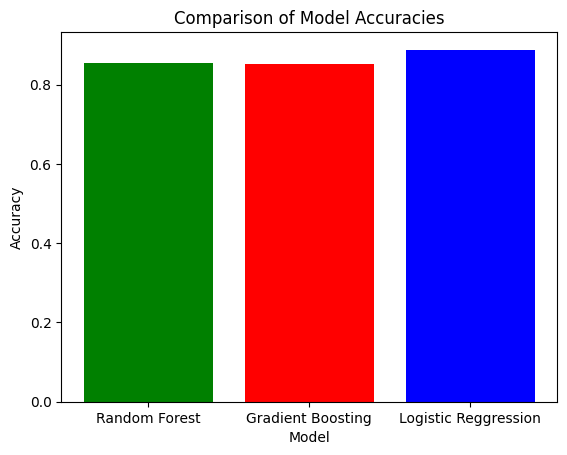

In [ ]:
models = ['Random Forest', 'Gradient Boosting', 'Logistic Reggression']
accuracies = [rf_acc, gb_acc, log_acc]
colors = ['green', 'red', 'blue']


plt.bar(models, accuracies, color=colors)


plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')


plt.show()